<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/11_Predicting_Purchases_with_SVM_Classifieripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Predicting Purchases with SVM Classifier.</b></div>

## Overview

- This project uses a Support Vector Machine (SVM) classifier to predict whether a customer will make a purchase based on their age and estimated salary. By analyzing these two features, the model classifies potential buyers, helping businesses target relevant customers more effectively. The dataset includes binary labels indicating whether each individual made a purchase or not.

# *1.Import dataset*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#

# *2. Import datasets*

In [ ]:
df=pd.read_csv('/Users/maegbug/Downloads/Svm_dataset.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
X=df[['Age', 'EstimatedSalary']]
Y=df['Purchased']

In [ ]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

#

# *3. Data splitting*

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.30, random_state=0)
print(X_Train.shape, X_Test.shape)

(280, 2) (120, 2)


In [ ]:
sc_X=StandardScaler()
X_Train=sc_X.fit_transform(X_Train)
X_Test=sc_X.fit_transform(X_Test)
X_Test

array([[-0.64807267,  0.53080315],
       [ 0.07535729, -0.59737588],
       [-0.19592895,  0.16490725],
       [-0.64807267,  0.28687255],
       [-0.19592895, -0.59737588],
       [-0.9193589 , -1.51211563],
       [-0.55764392, -1.66457226],
       [-0.1055002 ,  2.26880869],
       [-1.7332176 , -0.04853203],
       [ 0.88921599, -0.81081516],
       [-0.64807267, -0.6278672 ],
       [-0.82893016, -0.44491925],
       [-0.01507146, -0.44491925],
       [ 0.16578603,  0.2258899 ],
       [-1.55236011,  0.50031183],
       [-0.46721518,  1.44554291],
       [-0.01507146,  0.2258899 ],
       [-1.64278886,  0.4698205 ],
       [ 1.61264594,  1.84193014],
       [-0.19592895, -1.45113298],
       [-0.19592895, -0.68884985],
       [ 0.88921599,  2.26880869],
       [ 0.34664352, -0.56688455],
       [ 0.88921599,  1.07964701],
       [-1.28107388, -1.26818503],
       [ 1.07007347,  2.17733471],
       [-0.82893016,  0.53080315],
       [-0.73850141,  0.31736388],
       [-0.01507146,

#

# *4. Model Training*

In [ ]:
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_Train,Y_Train)

Y_predict=classifier.predict(X_Test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

#

# *5.Evaluation*

In [ ]:
classifier_1=SVC(kernel='rbf')
classifier_1.fit(X_Train, Y_Train)

Y_predict=classifier.predict(X_Test)
score=accuracy_score(Y_Test,Y_predict)
print('Accuracy Score: with default rbf kernel is ', score )

Accuracy Score: with default rbf kernel is  0.8583333333333333


In [ ]:
classifier_2=SVC(kernel='rbf',gamma=15, C=7 , random_state=0)
classifier_2.fit(X_Train,Y_Train)

Y_predict=classifier_2.predict(X_Test)
score=accuracy_score(Y_Test,Y_predict)
print('Accuracy Score : with default rbf kernel is ', score )

Accuracy Score : with default rbf kernel is  0.9


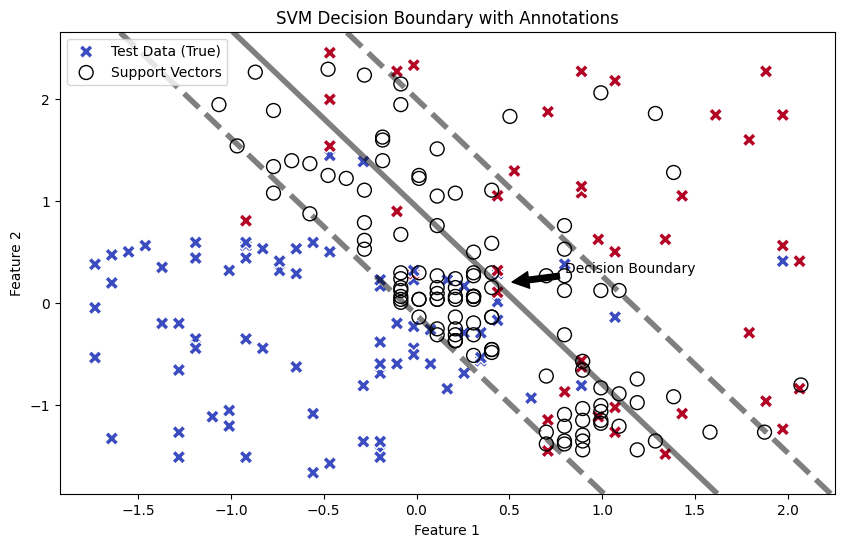

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, s=100, cmap='coolwarm', marker='X', edgecolor='WHITE', label='Test Data (True)')


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)


ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], linewidths=4)
plt.annotate('Decision Boundary', xy=(0.5, 0.2), xytext=(0.8, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))


ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Annotations')
plt.legend()
plt.show()




